# Tarea 1

## Probabilidad

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [2]:
# Cargar el set de datos de iris

iris = load_iris()
df_iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
targets = pd.DataFrame(iris['target'], columns=['target'])
d_targets = {idx:x for idx, x in enumerate(iris['target_names'])}
targets = targets['target'].map(d_targets)
df_iris = pd.concat([df_iris_data, targets], axis=1)
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Hacer uso de Pandas para ver y calcular las siguientes probabilidades en base a toda la población

In [3]:
# Usando los datos, calcular la probabilidad de, tomando una muestra aleatoria, que esta corresponda a la clase Virginica

casos_totales = df_iris.shape[0]
casos_v = (df_iris[df_iris['target'] == 'virginica']).shape[0]
# otra forma
# casos_v = df_iris.value_counts('target')['virginica']
prob_v = casos_v / casos_totales
prob_v

0.3333333333333333

In [4]:
# Usando los datos, calcular la probabilidad de que la característica petal_length sea mayor a 1.6

casos_pl = (df_iris[df_iris['petal length (cm)'] > 1.6]).shape[0]
prov_pl = casos_pl / casos_totales
prov_pl


0.7066666666666667

In [5]:
# Usando los datos, calcular la probabilidad de que, habiendo salido la clase Virginica, la característica petal_length sea mayor a 1.6

# nota propia: investigar uso de crossvalue()
df_iris_v = df_iris[df_iris['target'] == 'virginica']
casos_pl_en_v = (df_iris_v[df_iris_v['petal length (cm)'] > 1.6]).shape[0]
prov_pl_dado_v = casos_pl_en_v / df_iris_v.shape[0]
prov_pl_dado_v
# prov_pl_dado_v = prob_v, ya que todas las virginicia tienen el petal mayor a 1.6

1.0

In [6]:
# Usando los datos, calcular la probabilidad de que, habiendo salido la clase Virginica, la característica petal_length sea mayor o igual a 1.6

casos_pl_en_v_igual = (df_iris_v[df_iris_v['petal length (cm)'] >= 1.6]).shape[0]
prov_pl_igual_dado_v = casos_pl_en_v_igual / df_iris_v.shape[0]
prov_pl_igual_dado_v

1.0

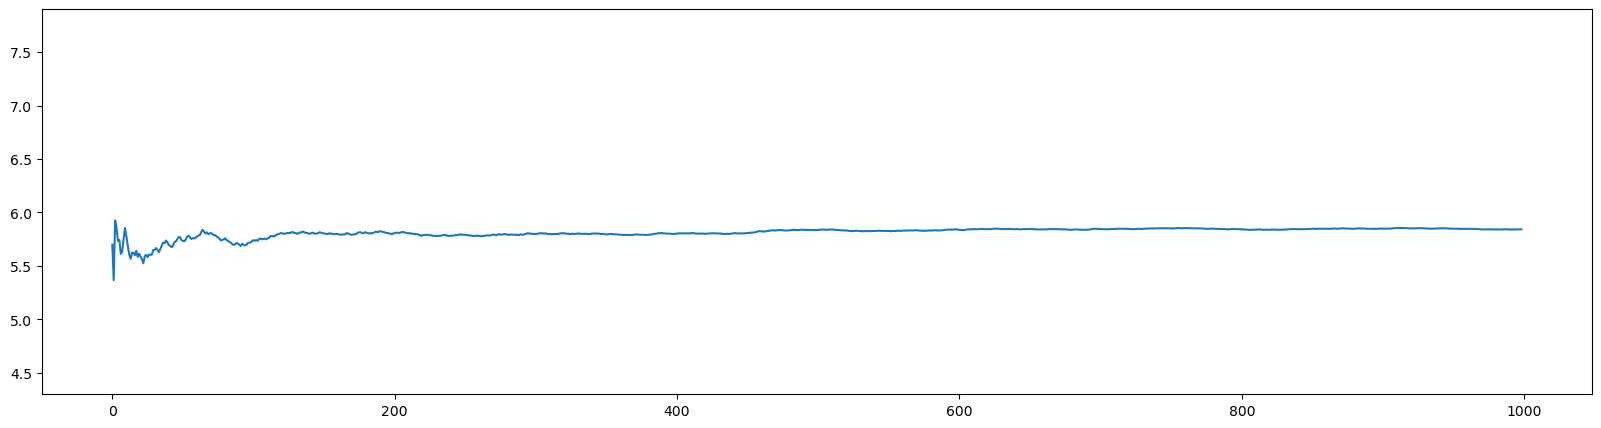

In [7]:
### Dado N, un número entre 1 y 1000, tomar n <=N muestras desde el set de datos anterior, y calcular la media de sepal_length, agregando aditivamente una muestra por vez.
### Esto significa que deberá, primero realizar este cálculo con una muestra (n = 1), luego, agregar otra y volver a calcular la media de las dos muestras (N = 2), realizando esta
###     acción iterativamente hasta llegar a n = N = 1000
### Grafique los cálculos en un gráfico bidimensional,  en dónde en el eje X represente n, y en el eje Y el promedio de ellas.
### En el mismo gráfico, represente la media poblacional de todas las muestras (que será constante)
df_additive = df_iris.sample(1)
mean = []

for n in range(1000-1):
    df_additive = pd.concat([df_additive, df_iris.sample(1)], axis = 0)
    mean.append( float(df_additive['sepal length (cm)'].mean()) )

plt.figure(figsize=(20,5))
plt.ylim( df_additive['sepal length (cm)'].min(), df_additive['sepal length (cm)'].max() )
plt.plot(mean)


## Estadística 

In [8]:
# Describa el set de datos iris, mostrando el promedio y la varianza de cada parámetro
mean_var = df_iris.mean()
print("###### medias ######\n", mean_var )

std_var = df_iris.std()
print("###### varianzas ######\n", std_var )

###### medias ######
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
###### varianzas ######
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


C:\Users\marcos\AppData\Local\Temp\ipykernel_8552\1722066561.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_var = df_iris.mean()
C:\Users\marcos\AppData\Local\Temp\ipykernel_8552\1722066561.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_var = df_iris.std()


In [9]:
# Describa el set de datos iris, mostrando el promedio y la varianza de cada parámetro, de acuerdo a la clase

for n in iris['target_names']:
    print("\n\n#######\tClase", n)
    df = df_iris[df_iris['target'] == n]
    print( "### medias\n", df.mean(), "\n### varianzas\n", df.std(), sep='' )




#######	Clase setosa
### medias
sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
dtype: float64
### varianzas
sepal length (cm)    0.352490
sepal width (cm)     0.379064
petal length (cm)    0.173664
petal width (cm)     0.105386
dtype: float64


#######	Clase versicolor
### medias
sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4.260
petal width (cm)     1.326
dtype: float64
### varianzas
sepal length (cm)    0.516171
sepal width (cm)     0.313798
petal length (cm)    0.469911
petal width (cm)     0.197753
dtype: float64


#######	Clase virginica
### medias
sepal length (cm)    6.588
sepal width (cm)     2.974
petal length (cm)    5.552
petal width (cm)     2.026
dtype: float64
### varianzas
sepal length (cm)    0.635880
sepal width (cm)     0.322497
petal length (cm)    0.551895
petal width (cm)     0.274650
dtype: float64


C:\Users\marcos\AppData\Local\Temp\ipykernel_8552\4090667919.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print( "### medias\n", df.mean(), "\n### varianzas\n", df.std(), sep='' )
C:\Users\marcos\AppData\Local\Temp\ipykernel_8552\4090667919.py:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print( "### medias\n", df.mean(), "\n### varianzas\n", df.std(), sep='' )
C:\Users\marcos\AppData\Local\Temp\ipykernel_8552\4090667919.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future ve

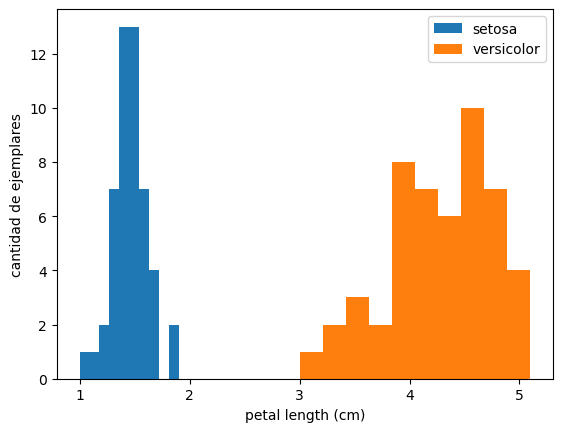

In [10]:
# Podría discriminar entre las clases 'setosa' y 'versicolor' con el feature 'petal length (cm)'?
# Muéstrelo en un histograma

# como vemremos, se puede distinguir porque las versicolor son mas largas
plt.hist(df_iris[df_iris["target"] == "setosa"]["petal length (cm)"], label="setosa")
plt.hist(df_iris[df_iris["target"] == "versicolor"]["petal length (cm)"], label="versicolor")
plt.xlabel('petal length (cm)')
plt.ylabel('cantidad de ejemplares')
plt.legend()
plt.show()


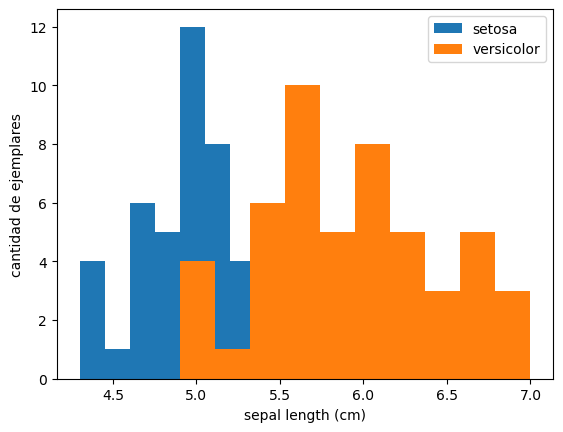

In [11]:
# Podría discriminar entre las clases 'setosa' y 'versicolor' con el feature 'sepal length (cm)'?
# Muéstrelo en un histograma

# es complicado, porque si bien la la versicolor suele ser mas larga, se solapan
plt.hist(df_iris[df_iris["target"] == "setosa"]["sepal length (cm)"], label="setosa")
plt.hist(df_iris[df_iris["target"] == "versicolor"]["sepal length (cm)"], label="versicolor")
plt.xlabel('sepal length (cm)')
plt.ylabel('cantidad de ejemplares')
plt.legend()
plt.show()

## Reglas de decisión

In [ ]:
# Elija un umbral de petal_length que le permita predecir a través de una condición >, o <=, sólamente a través de ese feature, si es de tipo setosa o no lo es
valor intermedio entre las dos medias


In [ ]:
# Elija, a través de los datos, un umbral de petal_length que le permita discriminar si es de tipo versicolor o no lo es, sólamente a través de ese feature.
# Saque conclusiones
valor intermedio entre las dos medias

In [ ]:
# Genere un código que elija, a través de los datos, un umbral de petal_length que le permita discriminar si es de tipo versicolor o no lo es, sólamente a través de ese feature, de forma tal que espere la misma tasa de falsos negativos que de falsos positivos
buscar un punto mediante iteraciones, hasta encontrar misma cantidad de casos positivos y negativos
o usar funcion que me de el percentil 50

In [ ]:
# Genere un código que elija, a través de los datos, un umbral de petal_length que le permita discriminar si es de tipo versicolor o no lo es, sólamente a través de ese feature, de forma tal que espere que la tasa de falsos negativos sea el doble que de falsos positivos

In [ ]:
# Genere un código que elija, a través de los datos, dos umbrales de petal_length que le permitan discriminar de que tipo es entre 'setosa', 'versicolor' y 'virginica', de forma tal que espere la misma tasa de falsos positivos que de falsos negativos para versicolor vs setosa y para versicolor vs virginica.